In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print("We have total", len(training_images), "images for training")
print("with", len(training_labels), "labels for each image")

We have total 60000 images for training
with 60000 labels for each image


In [6]:
print("We have taken", len(test_images), "images to test our model")
print("with", len(test_labels), "its labels for each image")

We have taken 10000 images to test our model
with 10000 its labels for each image


In [7]:
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


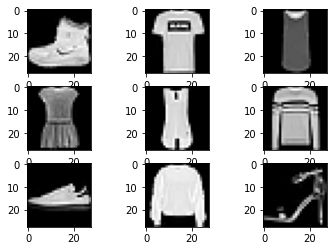

In [8]:
# Training Images

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(training_images[i], cmap=plt.get_cmap('gray'))
plt.show()

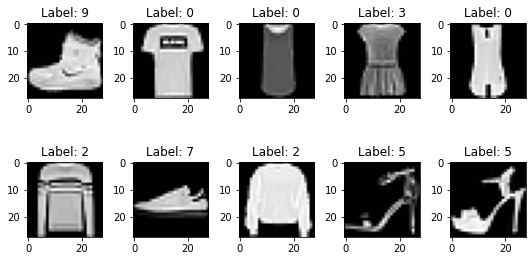

In [9]:
# Training Images with their labels

num = 10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(training_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(training_labels[i]))
plt.tight_layout()
plt.show()

In [10]:
training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

6


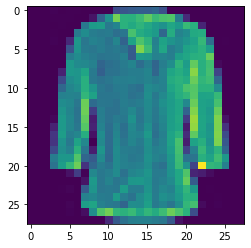

In [32]:
print(test_labels[4])
plt.imshow(test_images[4])
plt.show()

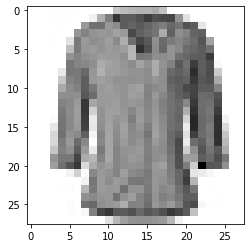

In [12]:
plt.imshow(test_images[4].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

### CNN Model consisting of: 2-Hidden layers, 1 flatten and 2 dense layer(1 for i/p and 1 for o/p) along with relu and softmax AF

In [13]:
model = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flattening the o/p
                                    tf.keras.layers.Flatten(),
                                    # 128 dense layers, and 10 output layers
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Adam Optimizer with Sparse categorical Crossentropy Loss function

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")])

In [17]:
history = model.fit(training_images,training_labels,batch_size=256,epochs=22,validation_split=.15)

Epoch 1/22
200/200 [==============================] - 34s 171ms/step - loss: 0.6498 - acc: 0.1005 - val_loss: 0.4669 - val_acc: 0.0940
Epoch 2/22
200/200 [==============================] - 33s 164ms/step - loss: 0.4079 - acc: 0.1032 - val_loss: 0.4014 - val_acc: 0.1179
Epoch 3/22
200/200 [==============================] - 34s 169ms/step - loss: 0.3605 - acc: 0.1033 - val_loss: 0.3813 - val_acc: 0.1338
Epoch 4/22
200/200 [==============================] - 36s 180ms/step - loss: 0.3290 - acc: 0.1038 - val_loss: 0.3310 - val_acc: 0.1011
Epoch 5/22
200/200 [==============================] - 35s 177ms/step - loss: 0.3039 - acc: 0.1034 - val_loss: 0.3151 - val_acc: 0.1248
Epoch 6/22
200/200 [==============================] - 31s 157ms/step - loss: 0.2836 - acc: 0.1022 - val_loss: 0.3017 - val_acc: 0.1173
Epoch 7/22
200/200 [==============================] - 31s 156ms/step - loss: 0.2676 - acc: 0.1025 - val_loss: 0.3139 - val_acc: 0.1011
Epoch 8/22
200/200 [==============================] - 3

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.3144 - acc: 0.1036
0.31438660621643066
0.10360000282526016


In [19]:
predictions = model.predict(test_images)
print(predictions[4])

[6.7569569e-02 6.2501271e-10 6.2942998e-03 9.1663433e-06 1.1302928e-03
 4.8740145e-10 9.2499667e-01 2.0406114e-10 2.4821001e-11 1.1884639e-09]


In [31]:
print("the label of the predicted image is:", np.argmax(np.round(predictions[4])))

the label of the predicted image is: 6


In [21]:
print('shape of the predicted label is: ' + str(predictions[4].shape))

shape of the predicted label is: (10,)


In [38]:
pred_labels=np.argmax(predictions,axis=1)
print("\nClass of the predicted image is -", pred_labels[:4])


Class of the predicted image is - [9 2 1 1]


The Image obtained from the predicted label is:


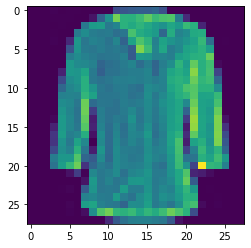

In [39]:
print("The Image obtained from the predicted label is:")
plt.imshow(test_images[pred_labels[6]])
plt.show()

In [40]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

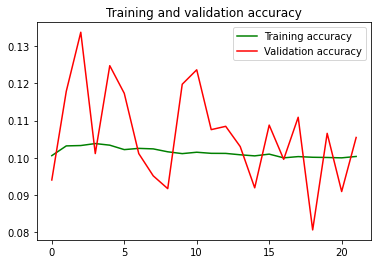

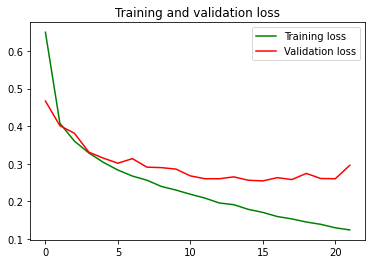

In [41]:
plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

90.12